# Prosper Loan - Data Analysis
## by Fredrick Okafor

## Introduction
> This is a report that presents a data analysis for Prosper Loan. Prosper loan dataset contains information of about over 113,000 loan listings and 84 variables pointing to a number of factors relating to the loans offered. My task is to manipulate the dataset with the aim of proffering actionable insights and analysis.











## Preliminary Wrangling

In [1]:
# import all packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import our dataset
df = pd.read_csv('Prosper Loan.csv')

In [3]:
# Converting column names to lowercase
df.columns= df.columns.str.lower()

In [4]:
df.head(3)

,listingkey,listingnumber,listingcreationdate,creditgrade,term,loanstatus,closeddate,borrowerapr,borrowerrate,lenderyield,...,lp_servicefees,lp_collectionfees,lp_grossprincipalloss,lp_netprincipalloss,lp_nonprincipalrecoverypayments,percentfunded,recommendations,investmentfromfriendscount,investmentfromfriendsamount,investors
0,1021339766868145413AB3B,193129,09:29.3,C,36,Completed,14/08/2009 00:00,0.16516,0.158,0.138,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,28:07.9,NaN,36,Current,NaN,0.12016,0.092,0.082,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,00:47.1,HR,36,Completed,17/12/2009 00:00,0.28269,0.275,0.240,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41


### What is the dataset structure?

> The Prosper Loan dataset is a table consisting of 81 colums, and 113,937 rows. Data types include but are not limited to float, integer, boolean. Entries provide information concerning customer and loan details.

### What are the main feature(s) of interest in this dataset?

> I find some columns in this dataset to be very interesting. They include; Term, Loan Status, Estimated Return, Borrower State, Estimated Loss, Borrower State, Occupation, Employment Status, Is Borrower Home owner, Currently In Group, Debt To Income Ratio, Income Range, Income Verifiable, Stated Monthly Income, Loan Original Amount.

### What feature(s) in the dataset will help support my investigation into the aforementioned feature(s) of interest?

> There are certain columns that I am particularly interested in; Term, Loan Status, Employment Status, Is Borrower Home owner, Currently In Group, Debt To Income Ratio, Income Range, Income Verifiable.
> I will also be plotting some visualizations using univariate and bivariate plots to explore many relationships in the dataset. Some findings and key insights would also be derived for a presentation.

## Univariate Exploration

> In this section, I will investigate distributions of individual variables, explore many relationships in the dataset and look out for unusual points.


1. What is the overall status of loans obtained by customers? 

There are over 50,000 customers who have an active current loan running, almost 40,000 customers have completed their payments, about 5,000 customers are defaulting and there are less than 50 customers who are past due.

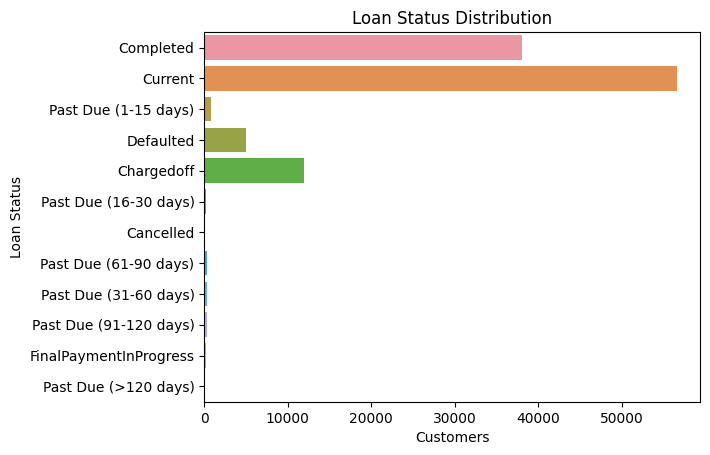

In [5]:
#infochart with seaborn
sns.countplot(data=df, y='loanstatus')
plt.xlabel('Customers')
plt.ylabel('Loan Status')
plt.title('Loan Status Distribution');

2. How about a visualization of the employment status of customers of Prosper Loan? 

There are over 66,000 customers who are currently employed, almost 30,000 customers have full time jobs and about 6,000 customers are self-employed as at the time of posting this dataset. The visualization below explains better.

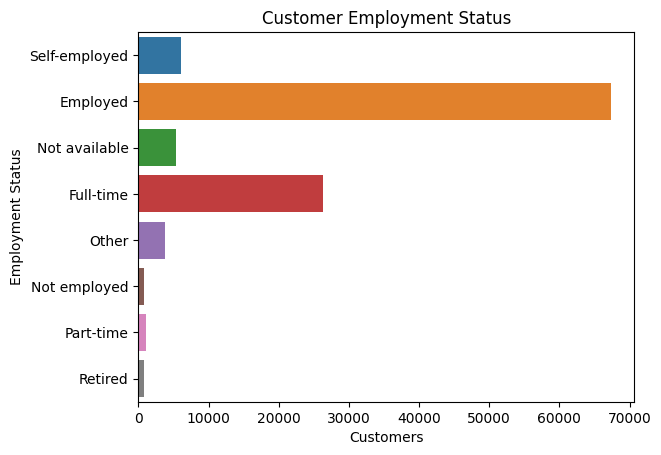

In [6]:
#infochart with seaborn
sns.countplot(data=df, y='employmentstatus')
plt.xlabel('Customers')
plt.ylabel('Employment Status')
plt.title('Customer Employment Status');

3. How many customers are actual home owners?

There are almost as many customers who are not home owners as there are customers who are home owners and have a mortgage on their credit profile. Kindly see visualization below.

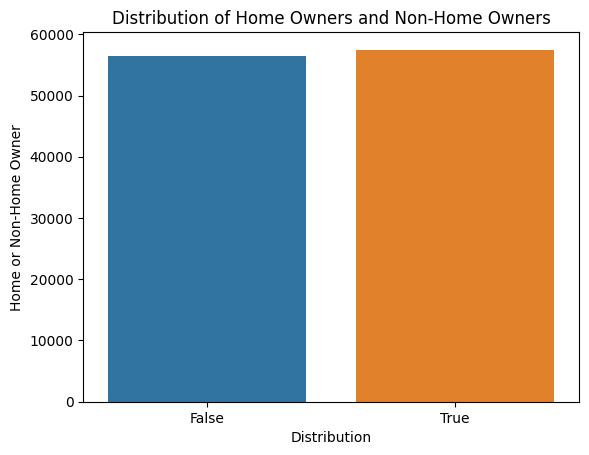

In [7]:
#infochart with seaborn
sns.countplot(data=df, x='isborrowerhomeowner')
plt.xlabel('Distribution')
plt.ylabel('Home or Non-Home Owner')
plt.title('Distribution of Home Owners and Non-Home Owners');

4. How much of revolving credit balance are available to customers?

The chart below shows the revolving credit balance higher or lower than mean value. Revolving credit balance higher than the average figure is lower than revolving credit balance lower than the average figure.

In [8]:
# finding the mean
df.revolvingcreditbalance.mean();
# replacing NaN with mean value
df.revolvingcreditbalance = df.revolvingcreditbalance.fillna(df.revolvingcreditbalance.mean());
# conditional statement
df['revolving_balance_status'] = np.where(df.revolvingcreditbalance > df.revolvingcreditbalance.mean(), 'High', 'Low');

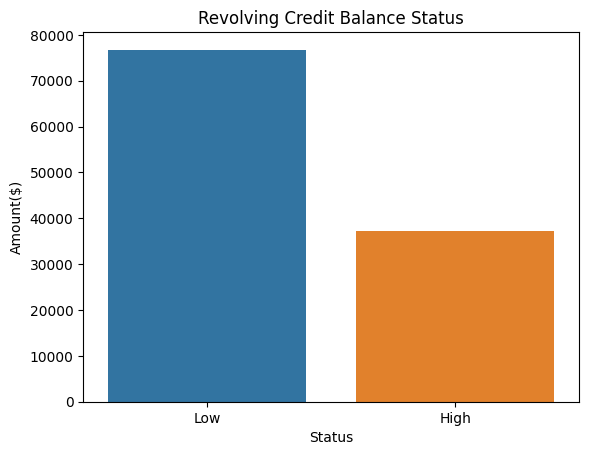

In [9]:
#infochart with seaborn
sns.countplot(data=df, x = 'revolving_balance_status')
plt.ylabel('Amount($)')
plt.xlabel('Status')
plt.title('Revolving Credit Balance Status');

5. What is the relationship between loans obtained by customers and their verifiable income?

More than 100,000 customers have a verifiable income source as against less than 10,000 customers who do not have a verifiable income source. 

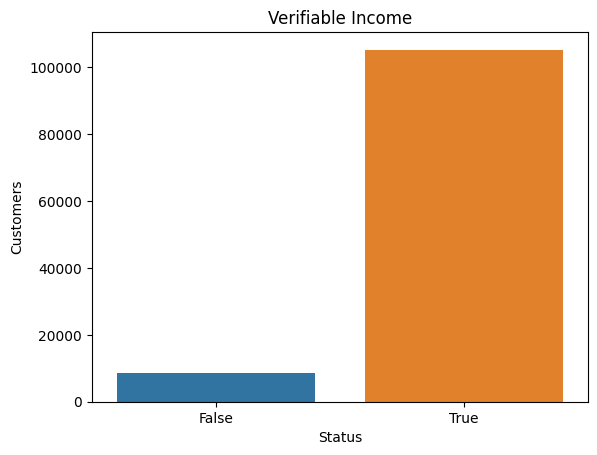

In [10]:
#infochart with seaborn
sns.countplot(data=df, x='incomeverifiable')
plt.title('Verifiable Income')
plt.xlabel('Status')
plt.ylabel('Customers');

6. Which term loan is popular among customers of Prosper Loan?

Lots of customers seem to prefer a 36 month term loan while the 12 month term loan is least favoured.

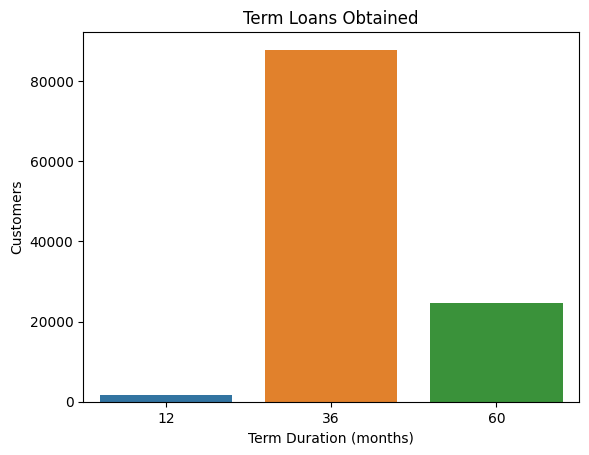

In [11]:
#infochart with seaborn
sns.countplot(data=df, x='term')
plt.title('Term Loans Obtained')
plt.xlabel('Term Duration (months)')
plt.ylabel('Customers');

7. What income range are the most vibrant in obtaining loans?

Here, we intend to group customers into income range/band and see what meaningful insight that would afford us. We see that customers within the 25,000-49,999 dollar income range show the highest patronage for the loan facilities of Prosper Loan. The 50,000-74,999 dollar and +100,000 dollar income ranges come in second and third place respectively.

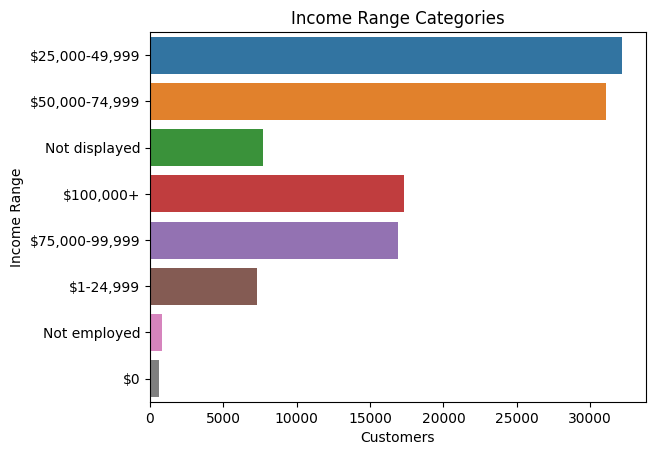

In [12]:
#infochart with seaborn
sns.countplot(data=df, y='incomerange')
plt.title('Income Range Categories')
plt.ylabel('Income Range')
plt.xlabel('Customers');

8. How many customers belong to groups or unions?

This can be important for management decisions and policy making. The visualization here tells us that there are a little over 100,000 customers who do not belong to any kind of group, while a little over 10,000 customers belong to some group or the other as at the time this dataset was concluded.

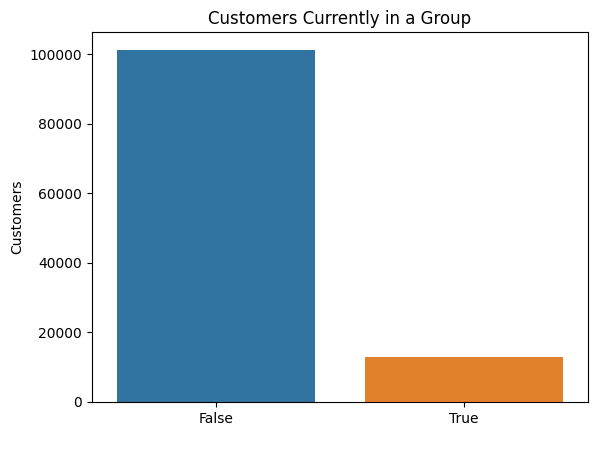

In [13]:
#infochart with seaborn
sns.countplot(data=df, x='currentlyingroup')
plt.title('Customers Currently in a Group')
plt.xlabel(' ')
plt.ylabel('Customers');

###  Was there a need to tidy, adjust, or change the form or feature of the data?

> - I imported numpy, pandas, matplotlib and seaborn to carry out my wranglings and visualizations.
> - I had to convert the column heads to lowercase as it is easier to work that way.
> - I aslo had to fill out the NaN cells in the revolving credit balance column with the mean of the values in that column. 
> - No transformations were needed for the above visualizations. There are not any adverse unusual points so far.

## Bivariate Exploration

> Here, I will analyze relationships between pairs of variables in this dataset.

9. When does debt to income ratio become a problem?

Generally, a higher debt to income ratio will naturally make credit lenders uncomfortable. The visualization below shows customer employment status and their debt to income ratings. Those customers in the Employed category show the highest degree of comfort when it comes to Prosper disbursing loans to this category. Next are customers who have full time jobs.

In [14]:
# finding the mean of debt to income ratio
df.debttoincomeratio.mean();
# grouping to uncomfortable or comfortable.
df['credit_rating'] = np.where(df.debttoincomeratio > df.debttoincomeratio.mean(), 'Uncomfortable', 'Comfortable');

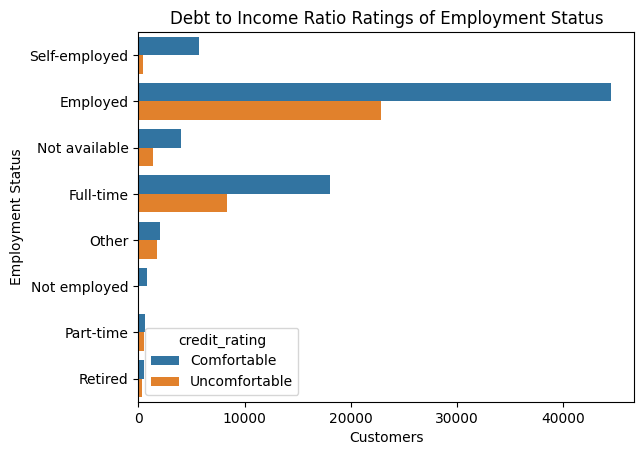

In [15]:
#infochart with seaborn
sns.countplot(data=df, y='employmentstatus', hue='credit_rating')
plt.title('Debt to Income Ratio Ratings of Employment Status')
plt.xlabel('Customers')
plt.ylabel('Employment Status');

10. Where are we at on defaults?

Defaults in repayments of principals and interests are a very crucial aspect of business like that of Prosper Loans. The visualization below indicates that customers who are employed and numbering more than 50,000 have the very least tendency to default and at the same time have the highest default rate compared to all the other classes of employment.

In [16]:
# obtaining the mean value of current delinquencies
df.currentdelinquencies.mean()
# conditional statement
df['defaults'] = np.where(df.currentdelinquencies > df.currentdelinquencies.mean(), 'High', 'Low')


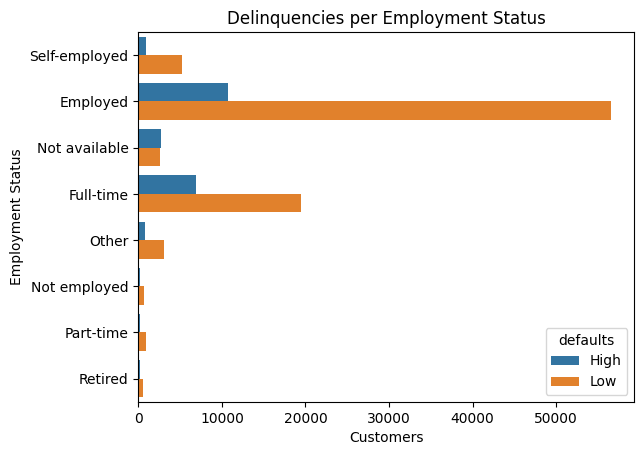

In [17]:
#infochart with seaborn
sns.countplot(data=df, y='employmentstatus', hue='defaults')
plt.title('Delinquencies per Employment Status')
plt.xlabel('Customers')
plt.ylabel('Employment Status');

11. What are the level of delinquencies among the income ranges?

The chart below visualizes a relationship between monthly income ranges and delinquencies. Customers of the 25,000-49,999 dollar and the 50,000-74,999 dollar income ranges have the lowest delinquencies.

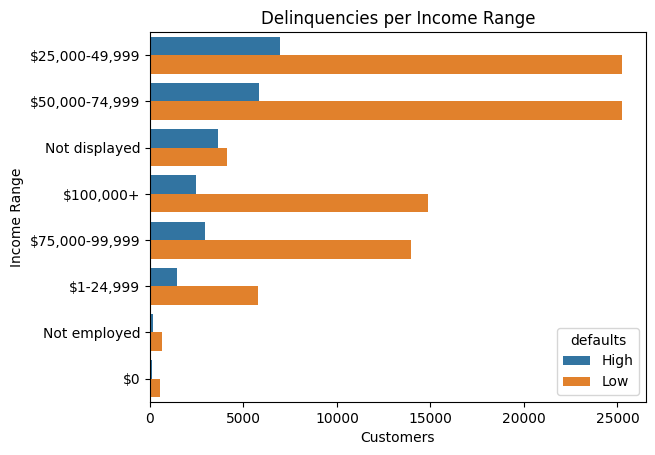

In [18]:
sns.countplot(data=df, y='incomerange', hue='defaults')
plt.title('Delinquencies per Income Range')
plt.xlabel('Customers')
plt.ylabel('Income Range');

### How did the feature(s) of interest vary with other features in the dataset?

> During my exploration, I discovered that there is a strong correlation between the income of the borrower and the loan amount obtained. There is also a correlation between employment status and the loan obtained. The customers in the +100,000 dollar category do not seem to have pressing needs to obtain loans. I have had to transform the debt to income ratio and current delinquencies columns. It is unusual that the 75,000-99,000 dollar range has a somewhat high delinquency figure despite the high income.



## Conclusions

Outside of the main features of interest it is worthy to note and conclude that;
- the fact that a borrower is a homeowner improved their chances of getting a higher loan amount. 
- most of the customers are credit worthy.
- the Employed category has the highest earning returns, Full time in second and Self-employed in third place. However, the 25,000-49,999 dollar income range has the highest returns, with 50,000-74,999 dollar and +100,000 dollar in second and third places respectively as regards earnings from loan disbursements.
- there is a strong correlation between the employment status of customers and loans obtained.
- there is an increased likelihood of obtaining loans when income source is verifiable.
- lots of customers opt for the 36 month term loan duration.
- Prosper Loans are more comfortable issuing loans to the Employed category. 
- the highest number of customers having loans are domiciled in California. Texas and New York come in second and third places respectively.
- Professionals, Computer Programmers, Executives and Teachers in that particular order took more loans than customers from other occupations.
- extremely few customers have running loans going past their due dates.
- I observed that the 75,000-99,000 dollar range has a high delinquency figure despite the high income range. The 50,000-74,999 dollar income range has the lowest rate of delinquency.
- retired and unemployed customers rarely took out loans, possibly due to repayment concerns.
- it is understandable that the Employed category also has the highest uncomfortable debt to income ratio among the rest. There are close to 70,000 customers in this category. Such high numbers will impact the debt to income ratio figure.
- debt collection policies of Prosper Loan appear to be adequate as incidences of bad/cancelled loans are not a problem here.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=a5de7ada-57ce-4b32-9952-67b897ff8598' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>